## Liver Faliure (Hepatitis C) - Prediction.

Hepatitis C

An infection caused by a virus that attacks the liver and leads to inflammation.

The virus is spread by contact with contaminated blood; for example, from sharing needles or from unsterile tattoo equipment.
Most people have no symptoms. Those who do develop symptoms may have fatigue, nausea, loss of appetite and yellowing of the eyes and skin

Data set url : http://archive.ics.uci.edu/ml/datasets/HCV+data

GitHub Repo Of this Analysis and Dataset in case of any faliure: 
https://github.com/toshihiroryuu/Machine_learning/tree/master/ML_004_Hepatitis

The target attribute for classification is Category (blood donors vs. Hepatitis C (including its progress ('just' Hepatitis C, Fibrosis, Cirrhosis)

## Attribute Information:

14 attributes - Data set from UCI (UNIVERSITY OF CALIFORNIA)- Irwin Machine Learning Reository

All attributes except Category and Sex are numerical. The laboratory data are the attributes 5-14.

Category (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis')

X (Patient ID/No., 
Age - age (in years), 
Sex - male or female(f,m), 
ALB - Albumin, 
ALP - Alkaline phosphatase, 
ALT - Alanine transaminase, 
AST - Aspartate aminotransferase, 
BIL - Bilirubin, 
CHE - cholinesterase, 
CHOL - Cholesterol, 
CREA - Creatine, 
GGT - Gamma-glutamyl transferase, 
PROT - Protien in urine, 

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno
# ! pip install missingno

url = "https://raw.githubusercontent.com/toshihiroryuu/Machine_learning/master/ML_004_Hepatitis/hcv.csv?token=ALRYHUDW5YYDYJDGFGNI6LS7VZWES"
# read hepatitis data set. 
df = pd.read_csv(url)

df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [2]:
# identify the size of data frame
print("Size of the data frame is",df.size)

# identify the shape of the data frame 
print("Shape of the data frame is",df.shape)
print("No of Rows = ", df.shape[0])
print("No of Columns = ", df.shape[1])
  
# identify the number of dimensions of your df
print("Dimentions(axis) of the data frame is",df.ndim)

df.describe()

Size of the data frame is 8610
Shape of the data frame is (615, 14)
No of Rows =  615
No of Columns =  14
Dimentions(axis) of the data frame is 2


,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


## Preprocessing
Change Category values

In [3]:
# Replace Category with meaning full entries.
df['Category'] = df['Category'].replace(['0=Blood Donor'],'Blood Donor')
df['Category'] = df['Category'].replace(['0s=suspect Blood Donor'],'Suspect Blood Donor')
df['Category'] = df['Category'].replace(['1=Hepatitis'],'Hepatitis')
df['Category'] = df['Category'].replace(['2=Fibrosis'],'Fibrosis')
df['Category'] = df['Category'].replace(['3=Cirrhosis'],'Cirrhosis')

df = df.drop(['Unnamed: 0'], axis=1)

df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


## Preprocessing
Change labels to categorical values

Replace male, female (Sex) to categorical values.
Male(m) to 1, Female(f) to 0

In [4]:
df['Sex'] = np.where(df['Sex'] == 'f', 0, 1)
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,Blood Donor,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,Blood Donor,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,Blood Donor,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,Blood Donor,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,Blood Donor,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,Cirrhosis,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,Cirrhosis,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,Cirrhosis,64,0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,Cirrhosis,46,0,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


Encode Category to 0, 1, 2, 3, 4

In [5]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["category"] = lb_make.fit_transform(df["Category"])

# 0 - Blood donor
# 1 - Cirrhosis
# 2 - Fibrosis
# 3 - Hepatits
# 4 - Suspect Blood Donor

df[df["category"] == 2].head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,category
564,Fibrosis,29,1,41.0,43.1,2.4,83.5,6.0,11.49,5.42,55.2,130.0,66.5,2
565,Fibrosis,40,1,39.0,43.1,23.8,114.7,11.0,9.64,4.20,70.9,127.3,81.3,2
566,Fibrosis,46,1,45.0,26.9,23.1,125.0,17.0,6.97,4.01,60.5,72.2,73.0,2
567,Fibrosis,48,1,49.0,45.2,19.3,69.1,30.0,7.76,4.22,76.7,28.4,72.3,2
568,Fibrosis,49,1,39.0,NaN,118.0,62.0,10.0,7.28,3.50,72.0,74.0,81.0,2


## Handle outliers using Scatter plots

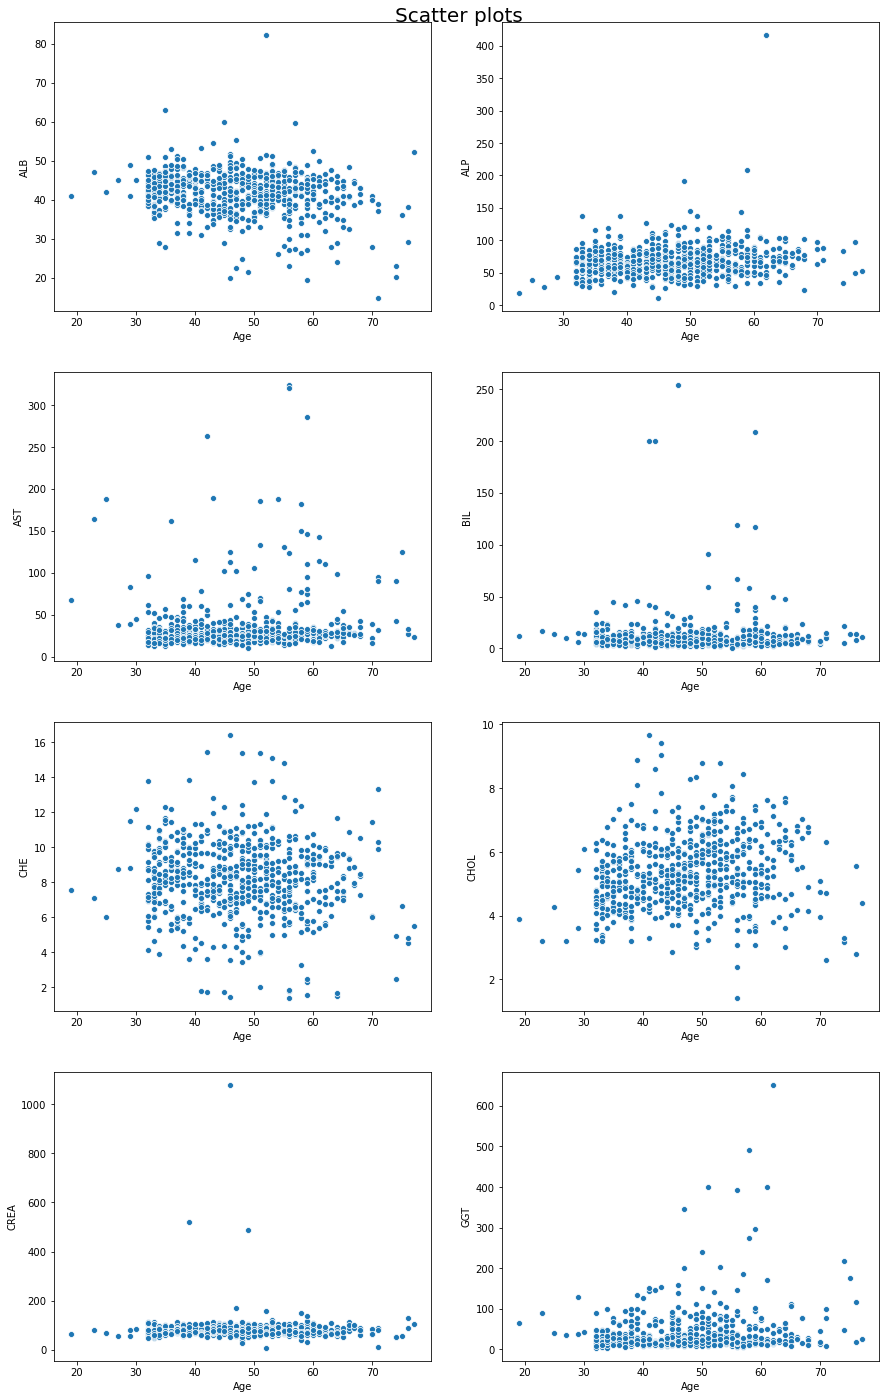

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4,2,figsize=(13,20))
plt.suptitle('Scatter plots', fontsize=20)
plt.tight_layout(4)

sns.scatterplot(data=df, x='Age', y='ALB',ax=ax[0][0])
sns.scatterplot(data=df, x='Age', y='ALP',ax=ax[0][1])
sns.scatterplot(data=df, x='Age', y='AST', ax=ax[1][0])
sns.scatterplot(data=df, x='Age', y='BIL', ax=ax[1][1])
sns.scatterplot(data=df, x='Age', y='CHE', ax=ax[2][0])
sns.scatterplot(data=df, x='Age', y='CHOL', ax=ax[2][1])
sns.scatterplot(data=df, x='Age', y='CREA', ax=ax[3][0])
sns.scatterplot(data=df, x='Age', y='GGT', ax=ax[3][1])

plt.show()

In [7]:
print("ALBUMIN")
df_out = df[df['ALB'] > 80]
print("No of rows to be dropped", df_out.shape[0])
df = df[~(df['ALB'] > 80)]

print("ALP")
df_out = df[df['ALP'] > 250]
print("No of rows to be dropped", df_out.shape[0])
df = df[~(df['ALP'] > 250)]

print("AST")
df_out = df[df['AST'] > 200]
print("No of rows to be dropped", df_out.shape[0])
df = df[~(df['AST'] > 200)]

print("Bilirumin -BIL")
df_out = df[df['BIL'] > 100]
print("No of rows to be dropped", df_out.shape[0])
df = df[~(df['BIL'] > 100)]

print("Creatine -CREA")
df_out = df[df['CREA'] > 400]
print("No of rows to be dropped", df_out.shape[0])
df = df[~(df['CREA'] > 400)]

print("GGT")
df_out = df[df['GGT'] > 300]
print("No of rows to be dropped", df_out.shape[0])
df = df[~(df['GGT'] > 300)]

print("Shape of the dataset after removing outliers", df.shape)

df

ALBUMIN
No of rows to be dropped 1
ALP
No of rows to be dropped 1
AST
No of rows to be dropped 4
Bilirumin -BIL
No of rows to be dropped 6
Creatine -CREA
No of rows to be dropped 3
GGT
No of rows to be dropped 4
Shape of the dataset after removing outliers (596, 14)


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,category
0,Blood Donor,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0
1,Blood Donor,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0
2,Blood Donor,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0
3,Blood Donor,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0
4,Blood Donor,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,Cirrhosis,58,0,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6,1
611,Cirrhosis,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,1
612,Cirrhosis,64,0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,1
613,Cirrhosis,46,0,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,1


## Handle missing values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 0 to 614
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  596 non-null    object 
 1   Age       596 non-null    int64  
 2   Sex       596 non-null    int32  
 3   ALB       595 non-null    float64
 4   ALP       579 non-null    float64
 5   ALT       595 non-null    float64
 6   AST       596 non-null    float64
 7   BIL       596 non-null    float64
 8   CHE       596 non-null    float64
 9   CHOL      587 non-null    float64
 10  CREA      596 non-null    float64
 11  GGT       596 non-null    float64
 12  PROT      596 non-null    float64
 13  category  596 non-null    int32  
dtypes: float64(10), int32(2), int64(1), object(1)
memory usage: 65.2+ KB


Total number of rows in this dataset is 596 after outlier removal.

In [9]:
miss_count = df.isnull().sum().sum()

print("No of missing values is",miss_count)

No of missing values is 28


In [10]:
# Get rows where the data is missing
null_data = df[df.isnull().any(axis=1)]
null_data

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,category
121,Blood Donor,43,1,48.6,45.0,10.5,40.5,5.3,7.09,NaN,63.0,25.1,70.0,0
319,Blood Donor,32,0,47.4,52.5,19.1,17.1,4.6,10.19,NaN,63.0,23.0,72.2,0
329,Blood Donor,33,0,42.4,137.2,14.2,13.1,3.4,8.23,NaN,48.0,25.7,74.4,0
413,Blood Donor,46,0,42.9,55.1,15.2,29.8,3.6,8.37,NaN,61.0,29.0,71.9,0
424,Blood Donor,48,0,45.6,107.2,24.4,39.0,13.8,9.77,NaN,88.0,38.0,75.1,0
433,Blood Donor,48,0,46.8,93.3,10.0,23.2,4.3,12.41,NaN,52.0,23.9,72.4,0
498,Blood Donor,57,0,48.4,94.4,2.5,39.6,2.3,8.84,NaN,82.0,6.4,76.8,0
540,Hepatitis,38,1,45.0,56.3,NaN,33.1,7.0,9.58,6.0,77.9,18.9,63.0,3
541,Hepatitis,19,1,41.0,NaN,87.0,67.0,12.0,7.55,3.9,62.0,65.0,75.0,3
545,Hepatitis,29,1,49.0,NaN,53.0,39.0,15.0,8.79,3.6,79.0,37.0,90.0,3


Plot bar graph to visualise the per column missing values.
We are using missingno library for this. Use pip install missingno if module not installed.

AxesSubplot(0.125,0.125;0.775x0.755)


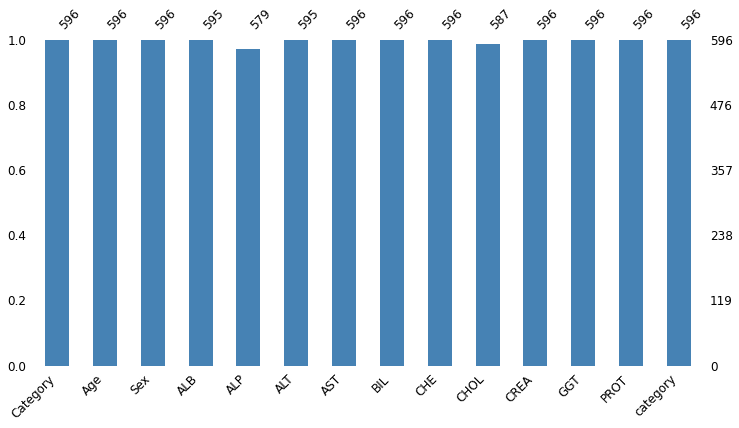

In [11]:
missing_bar  = msno.bar(df, figsize=(12, 6), fontsize=12, color='steelblue')

print(missing_bar)

Find the correlation between data to determine suitable method to handle missing data.

AxesSubplot(0.125,0.125;0.62x0.755)


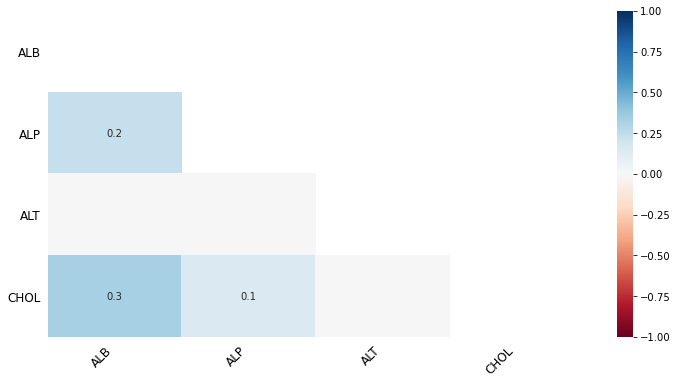

In [12]:
print(msno.heatmap(df, figsize=(12, 6), fontsize=12))

We can either drop the corresponding columns or replace it with mean.

In [13]:
# Compute mean with and without mean replacement of missing data.
df['ALP'].mean(), df['ALP'].fillna(df['ALP'].mean()).mean()

(66.93575129533683, 66.9357512953368)

In [14]:
df['CHOL'].mean(), df['CHOL'].fillna(df['CHOL'].mean()).mean()

(5.399522998296421, 5.399522998296423)

In [15]:
df['ALB'].mean(), df['ALB'].fillna(df['ALB'].mean()).mean()

(41.82201680672269, 41.82201680672269)

In [16]:
df['ALT'].mean(), df['ALT'].fillna(df['ALT'].mean()).mean()

(28.754453781512584, 28.75445378151258)

In [17]:
df['PROT'].mean(), df['PROT'].fillna(df['PROT'].mean()).mean()

(72.1986577181209, 72.1986577181209)

Mean computed before and after replacing null values with mean differ minutely.
Therefore missing values are replaced with corresponding mean.

In [18]:
df['ALP'].fillna(df['ALP'].mean(), inplace=True)
df['CHOL'].fillna(df['CHOL'].mean(), inplace=True)
df['ALB'].fillna(df['ALB'].mean(), inplace=True)
df['ALT'].fillna(df['ALT'].mean(), inplace=True)
df['PROT'].fillna(df['PROT'].mean(), inplace=True)
                  
miss_count = df.isnull().sum().sum()

print("No of missing values is",miss_count)

No of missing values is 0


## Dummy variables

In [19]:
# We have 5 labels inside category like hepatitis, fibrosis..etc
# One hot encoding
df_new = pd.get_dummies(df.Category)

df_new

,Blood Donor,Cirrhosis,Fibrosis,Hepatitis,Suspect Blood Donor
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
608,0,1,0,0,0
611,0,1,0,0,0
612,0,1,0,0,0
613,0,1,0,0,0


In [20]:
#Concat new rows with original data frame.
df = pd.concat([df_new, df], axis=1)
# Drop category after one hot encoding.
df = df.drop(['Category'], axis=1)

In [21]:
df.tail()

,Blood Donor,Cirrhosis,Fibrosis,Hepatitis,Suspect Blood Donor,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,category
608,0,1,0,0,0,58,0,34.0,46.400000,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6,1
611,0,1,0,0,0,64,0,24.0,102.800000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,1
612,0,1,0,0,0,64,0,29.0,87.300000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,1
613,0,1,0,0,0,46,0,33.0,66.935751,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,1
614,0,1,0,0,0,59,0,36.0,66.935751,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 0 to 614
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Blood Donor          596 non-null    uint8  
 1   Cirrhosis            596 non-null    uint8  
 2   Fibrosis             596 non-null    uint8  
 3   Hepatitis            596 non-null    uint8  
 4   Suspect Blood Donor  596 non-null    uint8  
 5   Age                  596 non-null    int64  
 6   Sex                  596 non-null    int32  
 7   ALB                  596 non-null    float64
 8   ALP                  596 non-null    float64
 9   ALT                  596 non-null    float64
 10  AST                  596 non-null    float64
 11  BIL                  596 non-null    float64
 12  CHE                  596 non-null    float64
 13  CHOL                 596 non-null    float64
 14  CREA                 596 non-null    float64
 15  GGT                  596 non-null    flo

In [23]:
df.describe()

,Blood Donor,Cirrhosis,Fibrosis,Hepatitis,Suspect Blood Donor,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,category
count,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000
mean,0.892617,0.025168,0.035235,0.036913,0.010067,47.273490,0.607383,41.822017,66.935751,28.754454,31.993121,9.382383,8.324094,5.399523,77.946477,34.234564,72.198658,0.246644
std,0.309859,0.156766,0.184528,0.188706,0.099913,10.102202,0.488743,5.309456,20.511936,25.522502,23.637838,7.818905,2.078226,1.107767,15.459053,34.303697,5.283295,0.774318
min,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,14.900000,11.300000,1.300000,10.600000,0.800000,1.540000,2.400000,8.000000,4.500000,44.800000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,39.000000,0.000000,39.000000,52.850000,16.600000,21.500000,5.200000,7.010000,4.640000,67.000000,15.600000,69.600000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,1.000000,42.000000,66.300000,23.050000,25.700000,7.100000,8.325000,5.315000,76.450000,22.900000,72.300000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,54.000000,1.000000,45.300000,78.300000,33.100000,31.925000,10.925000,9.632500,6.060000,88.000000,37.075000,75.400000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,77.000000,1.000000,62.900000,208.200000,325.300000,188.700000,91.000000,16.410000,9.670000,158.200000,295.600000,90.000000,4.000000


## Data scaling

In [24]:
from sklearn import preprocessing

cols_to_scale = ['ALB', 'ALP', 'ALT', 'AST','BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

scaler = preprocessing.MaxAbsScaler()
# scaler = preprocessing.MinMaxScaler()
# scaler = preprocessing.StandardScaler()

def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

df = scaleColumns(df, cols_to_scale)

df.describe()

,Blood Donor,Cirrhosis,Fibrosis,Hepatitis,Suspect Blood Donor,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,category
count,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,596.000000
mean,0.892617,0.025168,0.035235,0.036913,0.010067,47.273490,0.607383,0.666591,0.322039,0.088802,0.164565,0.100612,0.509983,0.560510,0.492583,0.112336,0.801897,0.246644
std,0.309859,0.156766,0.184528,0.188706,0.099913,10.102202,0.488743,0.082857,0.097297,0.078305,0.114934,0.080498,0.124307,0.114034,0.095128,0.108863,0.056721,0.774318
min,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.236884,0.054275,0.006456,0.063593,0.008791,0.093845,0.248190,0.050569,0.015223,0.522222,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,39.000000,0.000000,0.621622,0.254563,0.051952,0.113408,0.057143,0.430225,0.480869,0.429836,0.052097,0.773333,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,1.000000,0.669316,0.318924,0.071011,0.135665,0.078022,0.510055,0.553257,0.486726,0.076793,0.803333,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,54.000000,1.000000,0.720191,0.377522,0.101752,0.167992,0.118681,0.588056,0.628749,0.556258,0.122124,0.837778,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,77.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.802781,1.000000,1.000000,4.000000


## Data visualisation

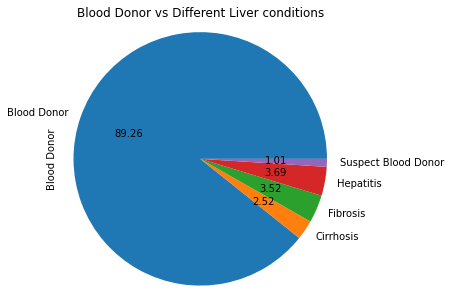

In [25]:
df_cat = df.groupby('category').count()

# find the percentages in the pie plot
import matplotlib.pyplot as plt

labels = ['Blood Donor', 'Cirrhosis', 'Fibrosis', 'Hepatitis', 'Suspect Blood Donor']

df_cat['Blood Donor'].plot(kind='pie', labels=labels, subplots=True, figsize=(5, 5), autopct='%.2f')



plt.title('Blood Donor vs Different Liver conditions')
plt.axis('equal')
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


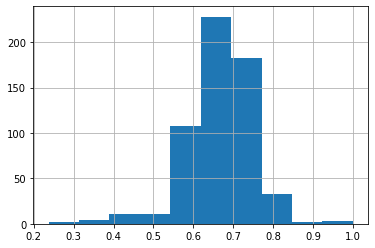

In [26]:
import matplotlib.pyplot as plt

print(df.ALB.hist())

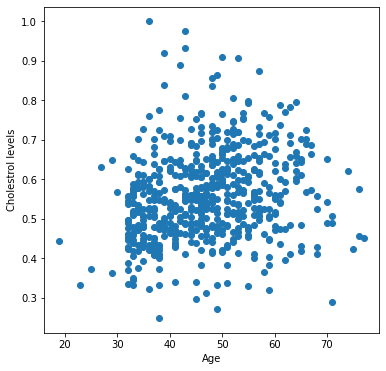

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(df['Age'], df['CHOL'])
ax.set_xlabel('Age')
ax.set_ylabel('Cholestrol levels')
plt.show()

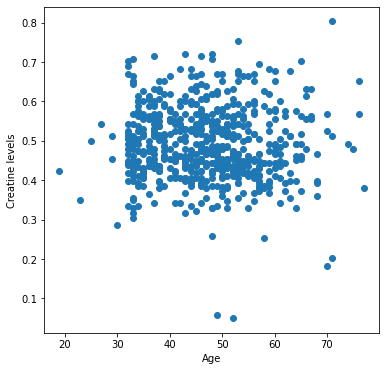

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(df['Age'], df['CREA'])
ax.set_xlabel('Age')
ax.set_ylabel('Creatine levels')
plt.show()

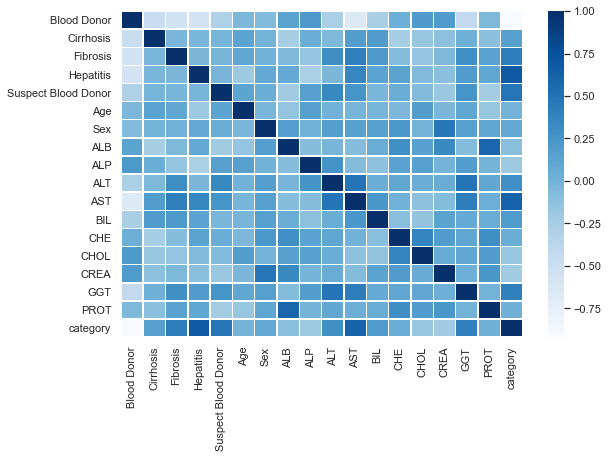

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap to Invertigate Correlation in Data
sns.set()
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df.corr(), linewidths=.5, ax=ax, cmap='Blues')
plt.show()

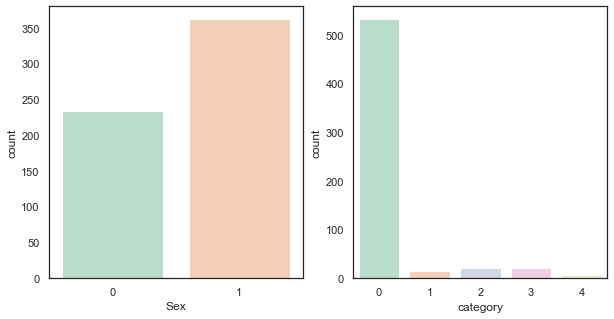

In [30]:
# Countplot for Binary Features
sns.set_style('white') 
fig, ax = plt.subplots(1,2,figsize=(10,5))

sns.countplot(df['Sex'], palette='Pastel2', ax=ax[0])
sns.countplot(df['category'], palette='Pastel2', ax=ax[1])

plt.show()

Thank you